# Exploratory Data Analysis
## Predicting Rates of Chronic Absenteeism

### Load Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas_profiling import ProfileReport
import matplotlib.style as style
style.use('fivethirtyeight')

#sns.set(rc={'figure.figsize':(8,4)})

In [2]:
#pip install pandas-profiling[notebook]

In [3]:
!pip freeze |grep pandas-profiling

pandas-profiling==2.8.0


In [2]:
#load wrangled NYC attendance data
df = pd.read_csv('/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_3/Capstone_3/data/interim/attendance_with_nextYear.csv')

In [5]:
df.head()

DBN                School Name               Grade     Year  \
0  01M015  P.S. 015 Roberto Clemente          All Grades  2013-14   
1  01M015  P.S. 015 Roberto Clemente  PK in K-12 Schools  2013-14   
2  01M015  P.S. 015 Roberto Clemente                  0K  2013-14   
3  01M015  P.S. 015 Roberto Clemente                   1  2013-14   
4  01M015  P.S. 015 Roberto Clemente                   2  2013-14   

  Demographic Category Demographic Variable  # Total Days  # Days Absent  \
0         All Students         All Students         34803         2783.0   
1         All Students         All Students          4711          560.0   
2         All Students         All Students          7073          659.0   
3         All Students         All Students          6739          525.0   
4         All Students         All Students          3988          308.0   

   # Days Present  % Attendance  # Contributing 20+ Total Days  \
0         32020.0          92.0                          216.0   
1          4151.0          88.1                           30.0   
2          6414.0          90.7                           44.0   
3          6214.0          92.2                           42.0   
4          3680.0          92.3                           25.0   

   # Chronically Absent  % Chronically Absent  Next Year % Chronically Absent  
0                  58.0                  26.9                            23.4  
1                  16.0                  53.3                            65.2  
2                  13.0                  29.5                            30.0  
3                  13.0                  31.0                            18.8  
4                   5.0                  20.0                            21.9

## Build data profiles and tables
    ○ Inferential statistics


In [6]:
#define function to print pandas profiling report and save as html
def show_save_pandas_profiling(dataframe, directory_path, filename):
    '''create and save pandas profiling report as html'''
    profile = ProfileReport(dataframe)
    print(profile)
    os.chdir(directory_path)
    profile.to_file(filename)

In [7]:
profile = ProfileReport(df)
profile

In [8]:
#show_save_pandas_profiling(df,'/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_3/Capstone_3/reports', 'notebook-1.1-attendance_EDA.html')

## Explore data relationships
    ○ Data visualization


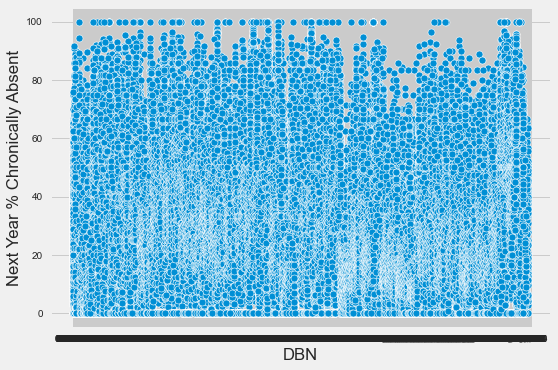

In [ ]:
#get scatterplot for all interactions with target variable
for col in df.columns:
    sns.scatterplot(x=col, y='Next Year % Chronically Absent', data=df)
    plt.show()

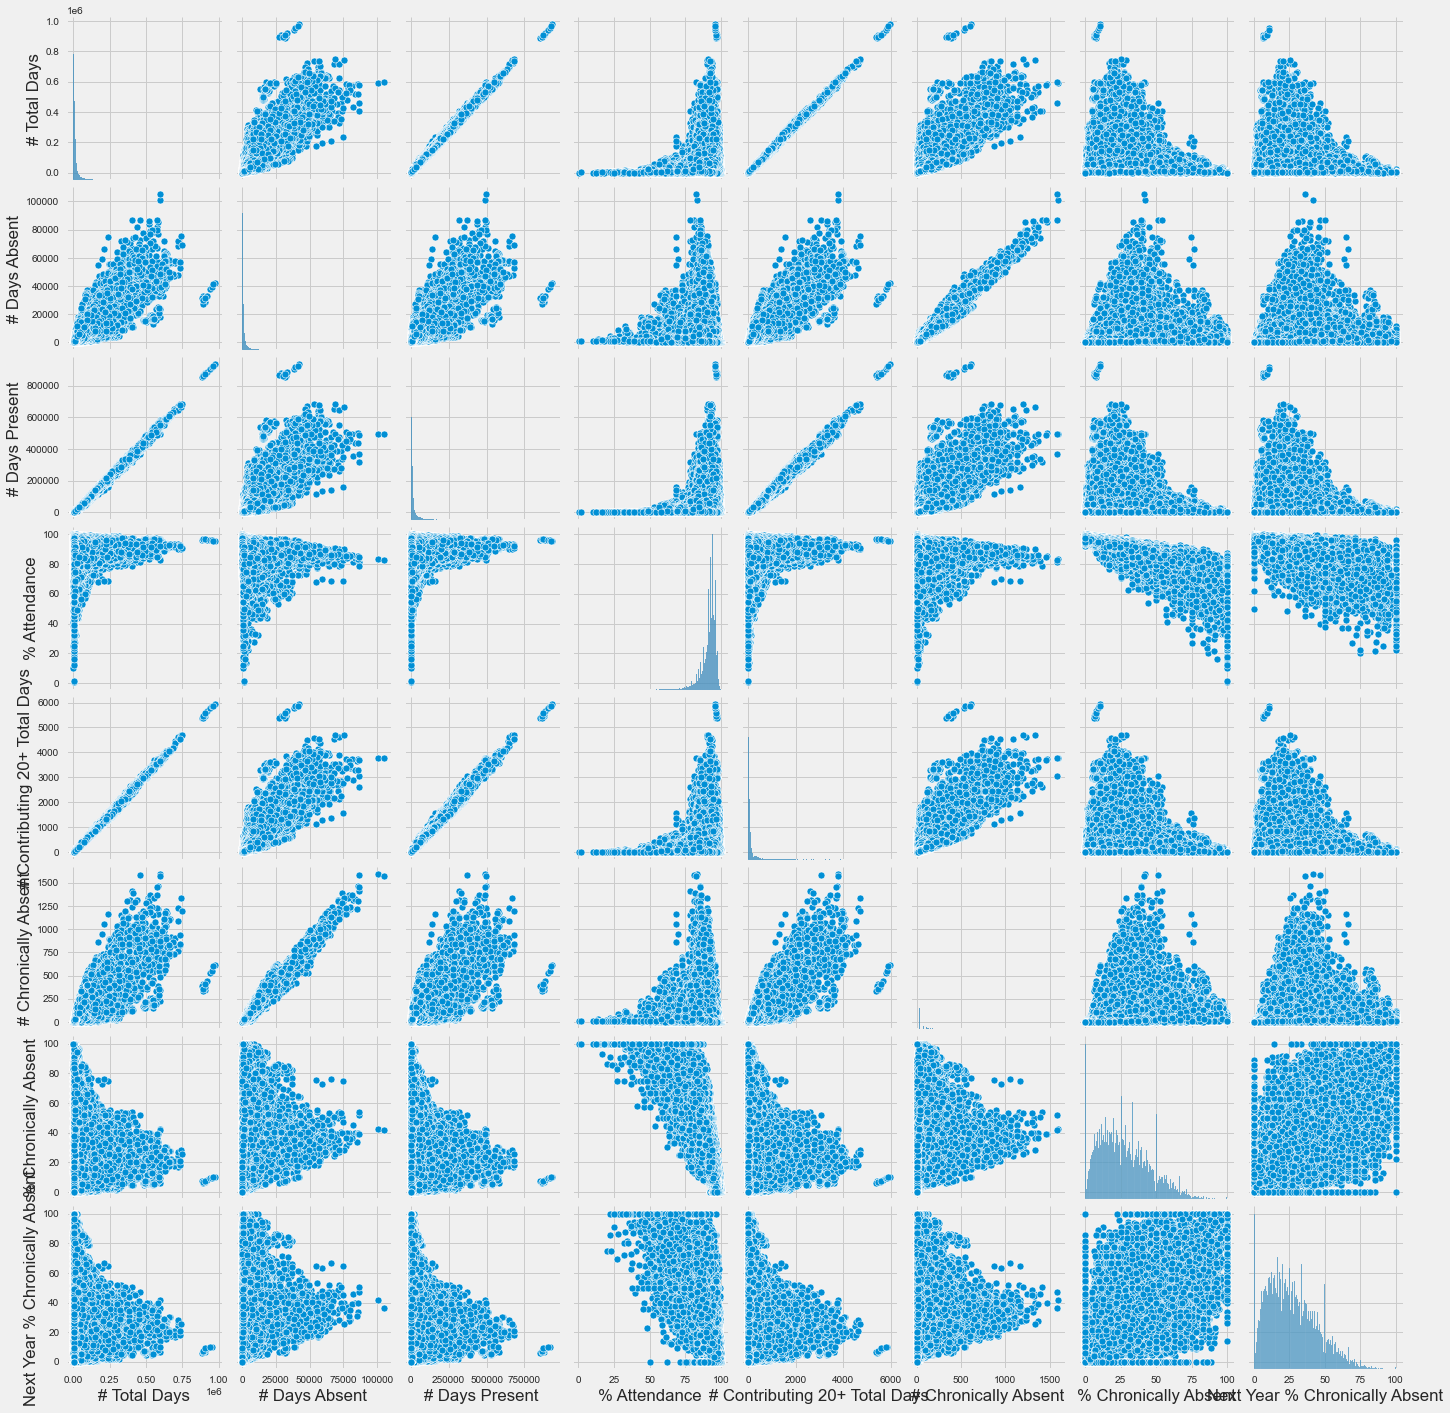

In [10]:
#scatter plot of each numeric variable with all other numeric variable 
sns.pairplot(df)

<AxesSubplot:xlabel='Year', ylabel='% Chronically Absent'>

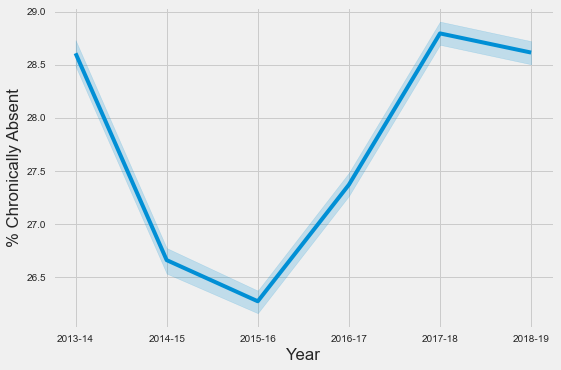

In [11]:
#lineplot year vs. % Chronically absent
sns.lineplot(x='Year', y='% Chronically Absent', data=df)

<AxesSubplot:xlabel='Year', ylabel='% Chronically Absent'>

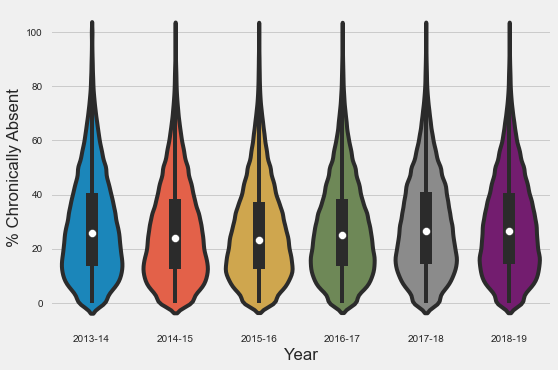

In [12]:
#violinplot each of the categorical variables vs. % chronically absent
sns.violinplot(x='Year', y='% Chronically Absent', data=df)

<AxesSubplot:xlabel='Demographic Category', ylabel='% Chronically Absent'>

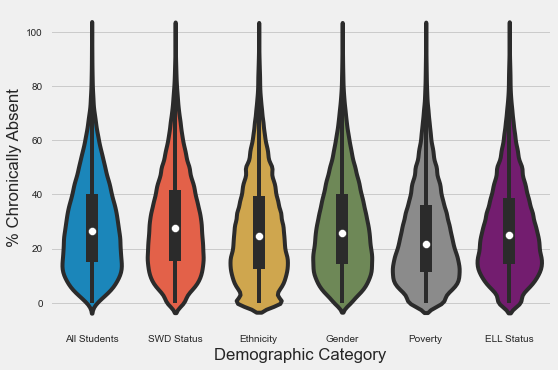

In [13]:
sns.violinplot(x='Demographic Category', y='% Chronically Absent', data=df)

<AxesSubplot:xlabel='Demographic Variable', ylabel='% Chronically Absent'>

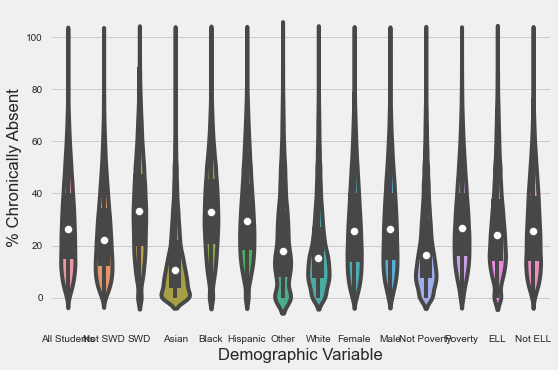

In [14]:
sns.violinplot(x='Demographic Variable', y='% Chronically Absent', data=df)

<AxesSubplot:xlabel='Grade', ylabel='% Chronically Absent'>

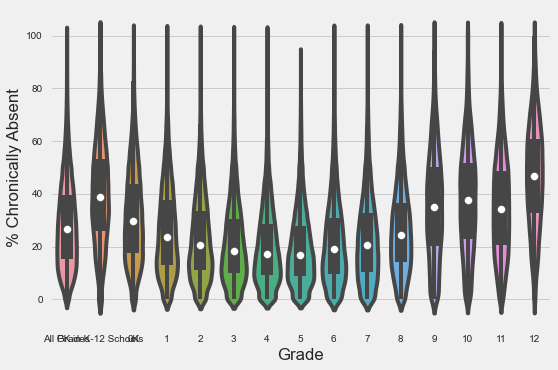

In [15]:
sns.violinplot(x='Grade', y='% Chronically Absent', data=df)

<AxesSubplot:xlabel='Year', ylabel='% Chronically Absent'>

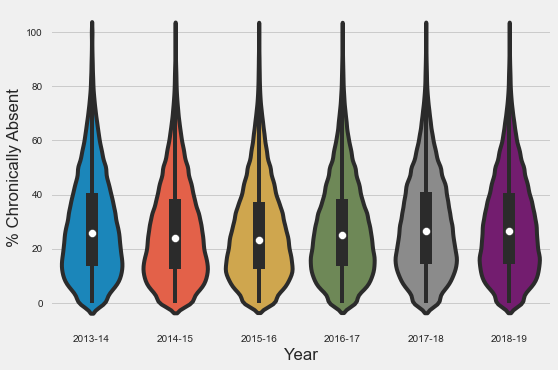

In [16]:
sns.violinplot(x='Year', y='% Chronically Absent', data=df)

## Feature Selection and Engineering

In [17]:
#see notebook 1.0 Data Wrangling where data was aggregated by year 
    #and the feature 'Next Year % Chronically Absent' was created before merging all years back together.
    
    
#Below see further discussion of thinking behind future feature selection and engineering

High Correlations - **need to decide which 4 features to drop. Consider scaling the data and perfoming PCA to hellp with this (see Guided Capstone EDA notebook)**

- #Days Present is highly correlated with # Total Days and # Contributing 20+ Total Days
    - Drop # Contributing 20+ Total Days since we don't yet understand that variable
    - Drop Total Days because Days Present is more generalizable later on
- #Chronically Absent is highly correlated with # Days Absent 
    - Drop # Chronically Absent because current day will have # Days Absent
    - or retain # Chronically Absent because this will be of interest later on..
- Demographic Variable is highly correlated with Demographic Category
    - Drop Demographic Variable as Demographic Category contains all this information

- **get 4 unique dbn not with school schoolname?**
- need to deal with NaNs
    - drop the NaNs for schools that have more than 50% of their data as null?
    - impute the data based on that school's avg, year's avg, grade's avg., demographic's avg. variable
- some school names have more frequency than others. PS 212 and PS 253 make up 0.2% of the data, double any other school.
- there is more elementary school data than middle school data (by about 2% points)
- Ethnicity makes up the largest Demographic Category at 33.3%, double the size of the next largest
- Demographic Variable is more evenly split in each feature size **out of the Demographic columns may be the one to keep, since both are highly correlated and this one has more variables and the data is more evenly split amongst them**

- target variable '% Chronically Absent' seems most values fall in 13.5%-34.9%


Outliers
- It seems #Total Days/# Days Absent/# Days Present/# Contributing 20+ Days/# Total Days/# Chronically Absent have HUGE outliers, and are highly skewed **After deciding which of these variables we will retain (some are highly correlated). Consider dropping outliers outside the 5th/95th percentile or 3 std above or below? Could check to see which schools they are from before dropping, if the outliers make up a large % of a few schools maybe consider inputing the 3x std./95th percentile to retain that school?**

- **Should also think about whether you need to standardize, log-transform or normalize your data, a, as well as statistically valid ways to remove outliers.**


Interactions - Numeric Values
- % Chronically Absent seems to have parabolic interactions with # Total Days (peaks at 20% Chronically Absent/750k days) 
- % Chronically Absent seems to have parabolic interactions with # Days Absent (peaks at 40% Chronically Absent/80k days) 
- % Chronically Absent also seems to have parabolic interactions with # Days Presnt, # Contributing to 20+ Days, and # Chronically Absent 
- #Days Absent and # Chronically Absent seem to have normal distributions in their interactions with % Chronically Absent (this seems to make sense)
- % Chronically Absent drops from 2013-14 by 2% and stays low for 2014-15 and 2015-2016 but then starts rising again until 2017-2018 and starts to level off again in 2018-2019. I wonder if this is a statistic anomoly?\

Interactions - Categorical Variables
- The distributions of % Chronically Absent are similar across years
- There are some interesting bumps as distribtuion of % Chronically Absent comes to 0% across Demographic Categories. There is an increase in theis area for Ethnicity and Poverty most noticibly. 
- Demographic Variables and % Chronically Absent have a lot variation. 
    - With Students with disabilities (SWD), Black and Hispanic students having the highest % Chronically Absent. While, Asian, and White students have the lowest % Chronically Absent.
    - Not SWD has much lower % Chronically Absent than SWD, Not Poverty has much lower % Chronically Absent than Poverty. 
    - Male/Female have similar rates of % Chronically Absent (Females have slightly less). And ELL has very slightly lower % Chronically Absent than Not ELL
        - **These may be an interesting relationships to look further into, with the goal of closing the gaps more in the other groups**
- Grade and % Chronically Absent also have a lot of variation
    - There is a parapolic relationship the the highest rates of % Chronically Absent in PreK/K and 9-12 grade (high school). 12th grade having the highest of around 45-50% chronically absent.
    - The lowest % Chronically Absent can be seen from 2-7th grade (around 20% or less)
    

Correlations:
- % Chronically Absent has negative correlations with # Total Days, # Days Present, # Contributing 20+ Total Days
- % Chronically Abent has positive correlations with # Days Absent, # Chronically Absent
- % Chronically Abent is strongly negatively correlated with % Attendance and strongly positively correlated with Next Year % Chronically Absent
- *There are a lot of high correlations within the current variables, it will be interesting to look at this again once it has been decided which features to drop* 

From the Corellation it seems That % Chronically Absent is highly negatively correlated with % Attendance. Which makes sense. Schools that have low attendance numbers in general would have high chronically absent numbers.


**Null Hypothesis:**
- `Next Year % Chronically Absent` ARE NOT correlated with `% Attendance` and `% Chronically Absent` and can therefore not be used to model future `% Chronically Absent` Rates.

**Alternative hyptotheses:**
`Next Year % Chronically Absent` ARE correlated with `% Attendance` and `% Chronically Absent` and can therefore be used to model future `% Chronically Absent` Rates.

## Summary

- loaded wrangled NYC attendance data
- Built data profiles and tables
    - used pandas-profiling 
- explored data relationships
    - made scatterplot for all interactions with target variable
    - made scatter plot of each numeric variable with all other numeric variable 
    - made lineplot of year vs. % Chronically absent
    - made violinplot each of the categorical variables vs. % chronically absent
- Feature Selection & Engineering
    - see notebook 1.0 Data Wrangling where data was aggregated by year and the feature 'Next Year % Chronically Absent' was created before merging all years back together.
    - Above see further discussion of thinking behind future feature selection and engineering